In [ ]:
!pip install prophet

Import Libraries

In [2]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

Read DataSet

In [4]:
df = pd.read_csv('MaunaLoaDailyTemps.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [6]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [9]:
df=df[["DATE","AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


# Change Column Names for FB Prophet

In [10]:
df.columns = ['ds','y']

In [11]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


# Plot Your Data

<Axes: xlabel='ds'>

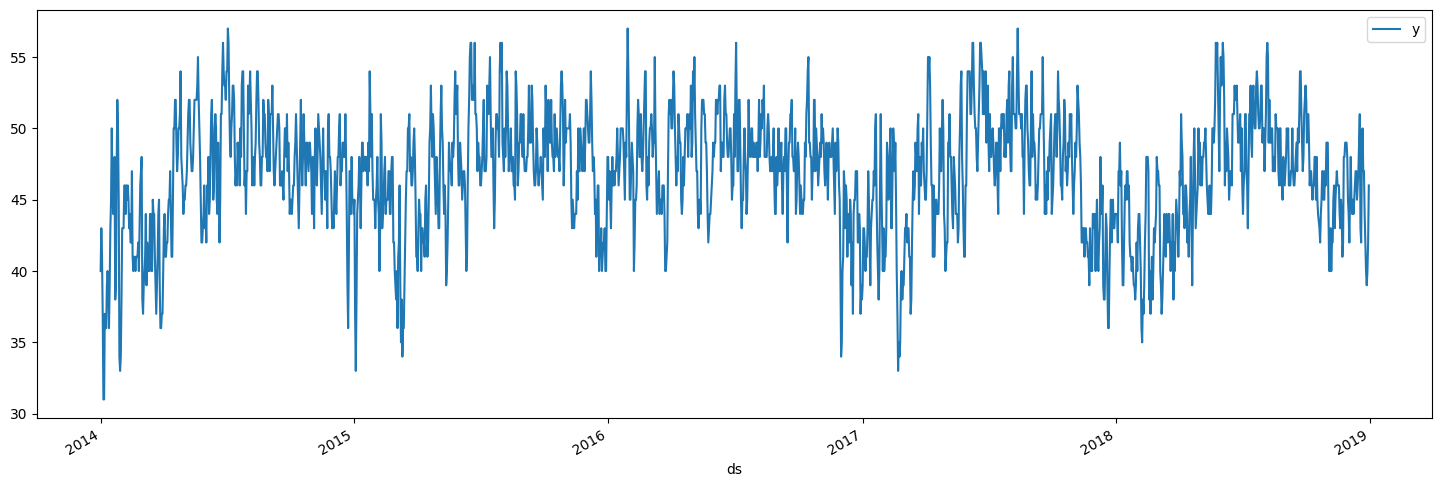

In [12]:
df.plot(x='ds',y='y',figsize=(18,6))

In [13]:
len(df)

1821

# Train, Test Split

In [14]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

# Start Making Predictions

In [15]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

15:03:46 - cmdstanpy - INFO - Chain [1] start processing
15:03:46 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2018-12-25,46.192062,36.970069,45.936640,44.774279,47.724606,-4.948818,-4.948818,-4.948818,-0.145826,-0.145826,-0.145826,-4.802992,-4.802992,-4.802992,0.0,0.0,0.0,41.243244
1817,2018-12-26,46.191314,37.045837,45.530042,44.764957,47.727422,-4.904014,-4.904014,-4.904014,-0.052643,-0.052643,-0.052643,-4.851371,-4.851371,-4.851371,0.0,0.0,0.0,41.287300
1818,2018-12-27,46.190565,37.160851,46.204294,44.760367,47.734553,-4.772865,-4.772865,-4.772865,0.098682,0.098682,0.098682,-4.871547,-4.871547,-4.871547,0.0,0.0,0.0,41.417700
1819,2018-12-28,46.189817,36.850784,46.273565,44.755777,47.742092,-4.436219,-4.436219,-4.436219,0.426907,0.426907,0.426907,-4.863127,-4.863127,-4.863127,0.0,0.0,0.0,41.753597
1820,2018-12-29,46.189068,36.362618,45.762834,44.750590,47.748351,-4.831995,-4.831995,-4.831995,-0.005789,-0.005789,-0.005789,-4.826206,-4.826206,-4.826206,0.0,0.0,0.0,41.357073


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1816,2018-12-25,41.243244,36.970069,45.936640
1817,2018-12-26,41.287300,37.045837,45.530042
1818,2018-12-27,41.417700,37.160851,46.204294
1819,2018-12-28,41.753597,36.850784,46.273565
1820,2018-12-29,41.357073,36.362618,45.762834


In [18]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


# USING BUILT-IN FB PROPHET VISUALIZATION
#  

In [19]:
plot_plotly(m ,forecast)

/home/v/Desktop/data_scientist/env/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 2, 0, 0),
                          datetime.datetime(2014, 1, 3, 0, 0), ...,
                          datetime.datetime(2017, 12, 27, 0, 0),
                          datetime.datetime(2017, 12, 28, 0, 0),
                          datetime.datetime(2017, 12, 29, 0, 0)], dtype=object),
              'y': array([40., 43., 41., ..., 45., 43., 43.])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 2, 0, 0),
                          datetime.datetime(2014, 1, 3, 0, 0), ...,
                          datetime.datetime(2018, 12, 27, 0, 0),
                          datetime.datetime(2018, 12, 28, 0, 0),
                          datetime.datetime(2018, 12, 29, 0, 0)], dtype=object),
              'y': array([35.47806628, 35.66045874, 35.75348354, ..., 37.16085125, 36.85078437,
                          36.36261841])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 2, 0, 0),
                          datetime.datetime(2014, 1, 3, 0, 0), ...,
                          datetime.datetime(2018, 12, 27, 0, 0),
                          datetime.datetime(2018, 12, 28, 0, 0),
                          datetime.datetime(2018, 12, 29, 0, 0)], dtype=object),
              'y': array([39.32745911, 39.63933972, 40.14881872, ..., 41.41769993, 41.75359742,
                          41.35707337])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 1, 1, 0, 0),
                          datetime.datetime(2014, 1, 2, 0, 0),
                          datetime.datetime(2014, 1, 3, 0, 0), ...,
                          datetime.datetime(2018, 12, 27, 0, 0),
                          datetime.datetime(2018, 12, 28, 0, 0),
                          datetime.datetime(2018, 12, 29, 0, 0)], dtype=object),
              'y': array([43.6107699 , 43.64128582, 44.35625882, ..., 46.20429437, 46.27356525,
                          45.76283421])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'title': {'text': 'ds'

In [1]:
plot_components_plotly(m, forecast)

NameError: name 'plot_components_plotly' is not defined

# Evaluate Your Model

In [ ]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
predictions = forecast.iloc[-365:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  3.461167223725586
Mean Value of Test Dataset: 46.3041095890411
